In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [292]:
df = pd.read_csv('MSFT.csv',index_col='date')
#df.index.freq='MS'

In [293]:
df.head()

,Open,High,Low,closing_price,Adj Close,Volume
date,,,,,,
13/03/1986,0.088542,0.101563,0.088542,0.097222,0.061109,1031788800
14/03/1986,0.097222,0.102431,0.097222,0.100694,0.063292,308160000
17/03/1986,0.100694,0.103299,0.100694,0.102431,0.064384,133171200
18/03/1986,0.102431,0.103299,0.098958,0.099826,0.062746,67766400
19/03/1986,0.099826,0.100694,0.097222,0.098090,0.061655,47894400


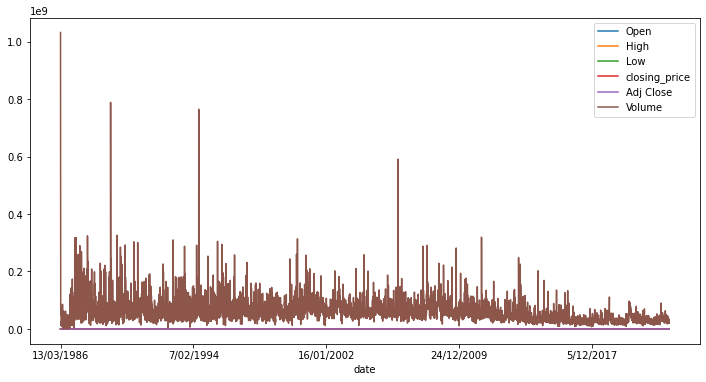

In [294]:
df.plot(figsize=(12,6))

In [295]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [296]:
#results = seasonal_decompose(df['closing_price'])
#results.plot();

In [297]:
len(df)

9165

In [298]:
#df.drop(['trading_code','last_traded_price','high','low','opening_price','yesterdays_closing_price','trade','value_mn','volume'],axis=1)
#df = df[['date', 'closing_price']]

#df

In [299]:
#df.drop(df.columns[[0,1, 2, 3, 4,6, 7, 8,9]], axis=1, inplace=True)
df.drop(df.columns[[0,1, 2, 4, 5]], axis=1, inplace=True)

In [300]:
df

,closing_price
date,
13/03/1986,0.097222
14/03/1986,0.100694
17/03/1986,0.102431
18/03/1986,0.099826
19/03/1986,0.098090
...,...
18/07/2022,254.250000
19/07/2022,259.529999
20/07/2022,262.269989


In [301]:
train = df.iloc[:-100]
test = df.iloc[-100:]

In [302]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [303]:
df.head(),df.tail()

(            closing_price
 date                     
 13/03/1986       0.097222
 14/03/1986       0.100694
 17/03/1986       0.102431
 18/03/1986       0.099826
 19/03/1986       0.098090,             closing_price
 date                     
 18/07/2022     254.250000
 19/07/2022     259.529999
 20/07/2022     262.269989
 21/07/2022     264.839996
 22/07/2022     260.359985)

In [304]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [305]:
scaled_train[:10]

array([[2.02437349e-05],
       [3.03656023e-05],
       [3.54294513e-05],
       [2.78351354e-05],
       [2.27742017e-05],
       [1.51828011e-05],
       [7.59140057e-06],
       [0.00000000e+00],
       [5.06093371e-06],
       [1.26523343e-05]])

In [306]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [307]:
# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [308]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[2.02437349e-05 3.03656023e-05 3.54294513e-05]
Predict this y: 
 [[2.78351354e-05]]


In [309]:
X.shape

(1, 3, 1)

In [310]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [311]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [312]:
# define model
#model = Sequential()
#model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(1))
#model.compile(optimizer='adam', loss='mse')

In [313]:
### Create the Stacked LSTM model

from keras.layers import Bidirectional

model=Sequential()
#model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(Bidirectional(LSTM(50,return_sequences=True,input_shape=(100,1))))

model.add(Bidirectional(LSTM(50,return_sequences=True)))
model.add(Bidirectional(LSTM(50)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [314]:
#model.summary()

In [315]:
# fit model
model.fit(generator,epochs=10)

Epoch 1/10
9053/9053 [==============================] - 219s 23ms/step - loss: 6.5934e-04
Epoch 2/10
9053/9053 [==============================] - 205s 23ms/step - loss: 2.6005e-04
Epoch 3/10
9053/9053 [==============================] - 208s 23ms/step - loss: 1.4417e-04
Epoch 4/10
9053/9053 [==============================] - 206s 23ms/step - loss: 1.1147e-04
Epoch 5/10
9053/9053 [==============================] - 205s 23ms/step - loss: 9.1366e-05
Epoch 6/10
9053/9053 [==============================] - 207s 23ms/step - loss: 7.9014e-05
Epoch 7/10
9053/9053 [==============================] - 203s 22ms/step - loss: 7.0746e-05
Epoch 8/10
9053/9053 [==============================] - 204s 23ms/step - loss: 6.8532e-05
Epoch 9/10
9053/9053 [==============================] - 204s 23ms/step - loss: 6.7232e-05
Epoch 10/10
9053/9053 [==============================] - 205s 23ms/step - loss: 5.8539e-05


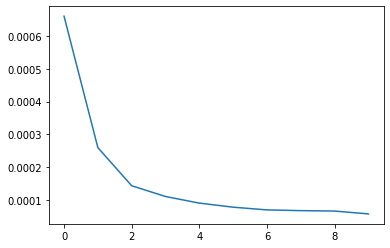

In [316]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [317]:
last_train_batch = scaled_train[-12:]

In [318]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [319]:
model.predict(last_train_batch)

array([[0.8663838]], dtype=float32)

In [320]:
scaled_test[0]

array([0.85959998])

In [321]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [322]:
test_predictions

[array([0.8663838], dtype=float32),
 array([0.86044395], dtype=float32),
 array([0.854666], dtype=float32),
 array([0.85047615], dtype=float32),
 array([0.84671366], dtype=float32),
 array([0.8418227], dtype=float32),
 array([0.8367845], dtype=float32),
 array([0.83250386], dtype=float32),
 array([0.82603914], dtype=float32),
 array([0.8232548], dtype=float32),
 array([0.8213481], dtype=float32),
 array([0.82020396], dtype=float32),
 array([0.8191216], dtype=float32),
 array([0.81794035], dtype=float32),
 array([0.8166249], dtype=float32),
 array([0.8152703], dtype=float32),
 array([0.8138912], dtype=float32),
 array([0.8124198], dtype=float32),
 array([0.8108243], dtype=float32),
 array([0.80920744], dtype=float32),
 array([0.8073071], dtype=float32),
 array([0.8054079], dtype=float32),
 array([0.8035612], dtype=float32),
 array([0.8018265], dtype=float32),
 array([0.80020666], dtype=float32),
 array([0.79869086], dtype=float32),
 array([0.7972634], dtype=float32),
 array([0.79591596]

In [323]:
test.head()

,closing_price
date,
1/03/2022,294.950012
2/03/2022,300.190002
3/03/2022,295.920013
4/03/2022,289.859985
7/03/2022,278.910004


In [324]:
true_predictions = scaler.inverse_transform(test_predictions)

In [325]:
test['predicted_closing_price'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [326]:
test.head()

,closing_price,predicted_closing_price
date,,
1/03/2022,294.950012,297.276992
2/03/2022,300.190002,295.239510
3/03/2022,295.920013,293.257557
4/03/2022,289.859985,291.820356
7/03/2022,278.910004,290.529750


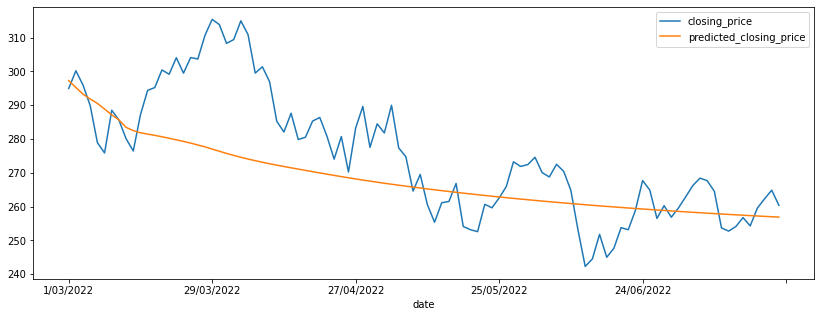

In [327]:
test.plot(figsize=(14,5))

In [328]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['closing_price'],test['predicted_closing_price']))
print(rmse)

14.760095262596074
